In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv


In [73]:
import random
random.seed(42)

kaggle_input_path = '/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv'
data = pd.read_csv(kaggle_input_path)

In [74]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Data Exploration

At this stage we are going to do some exploratory analysis. In particular, we will look at:

- The distribution of each variable.
- The presence of outliers in the data.
- The distribution of each variable given the response.
- Connection of the features with each other.
- Connection of the features with the response.

## Distribution Plots

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# draw data
def plot_data(data, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = data.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(data[column_name], kde = True, color = 'red')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=data[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

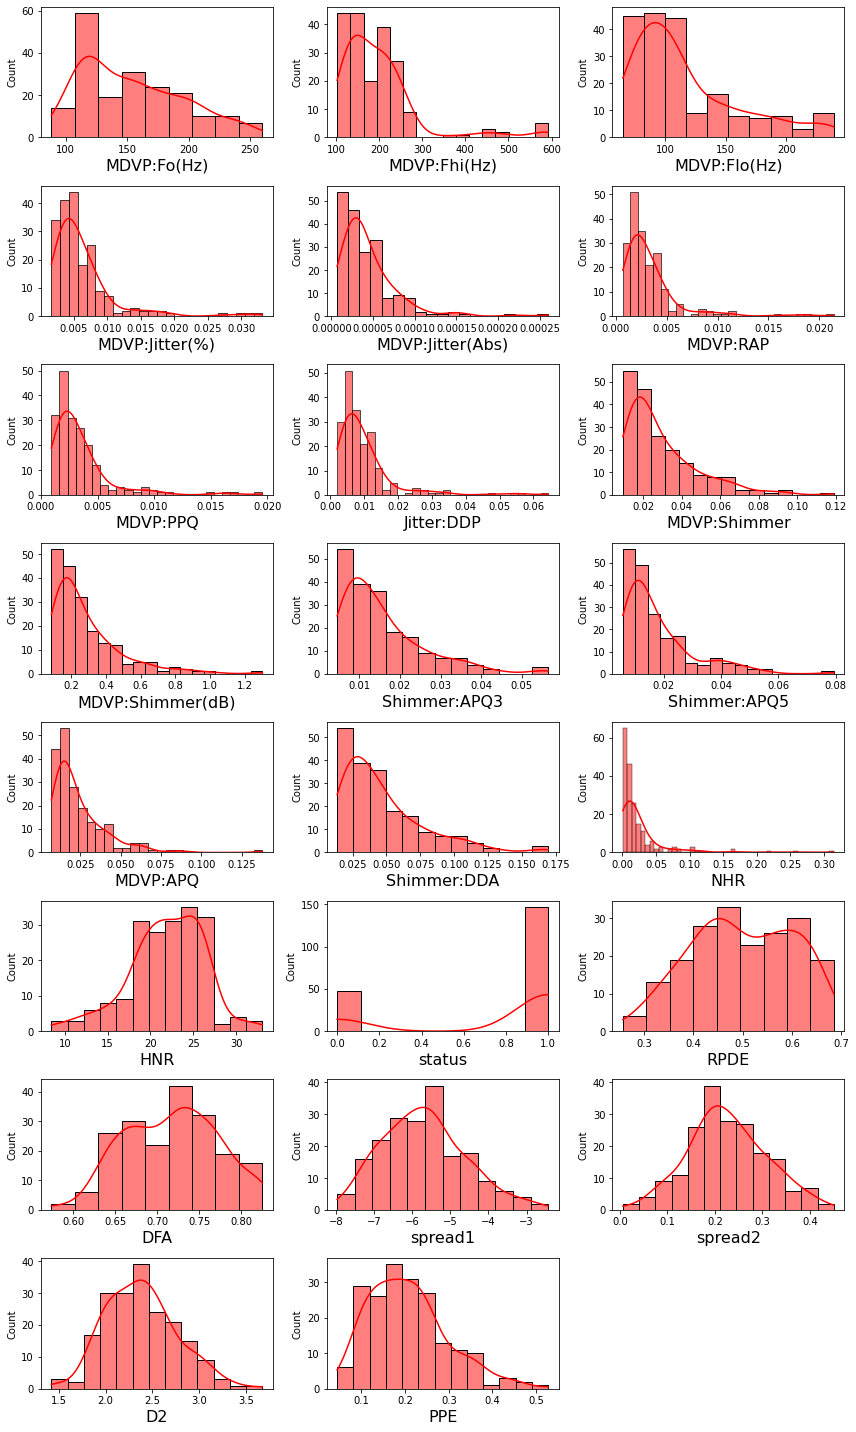

In [68]:
plot_data(data, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

## Box Plot

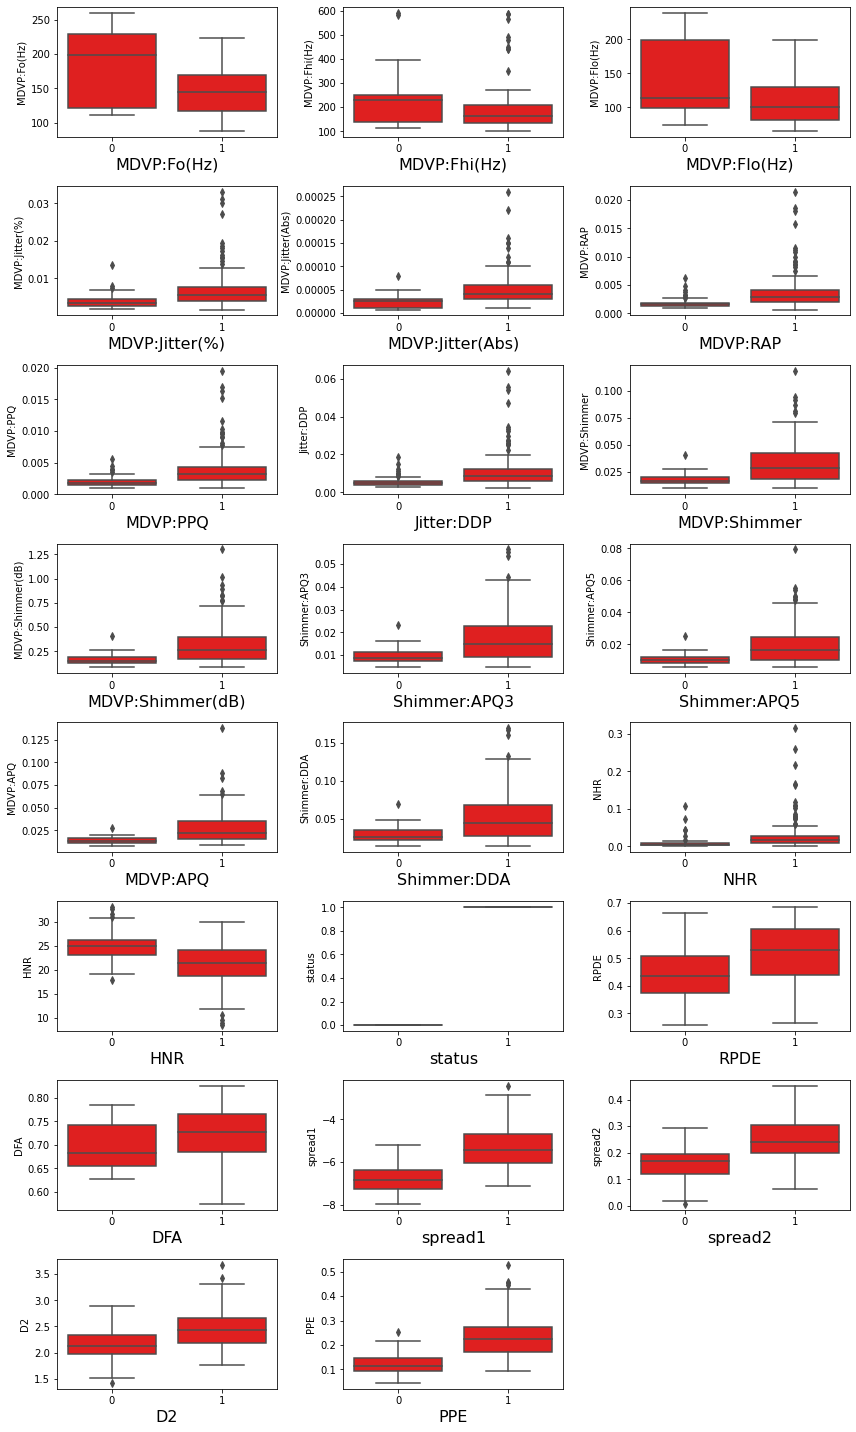

In [78]:
plot_data(data, y=data['status'], plot_type = 'boxplot', grid_size = (8,3), fig_size = (12, 20))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MDVP:Fhi(Hz)'>

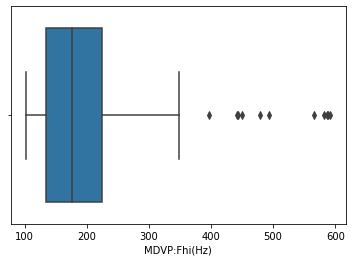

In [9]:
# remove outliers
sns.boxplot(data['MDVP:Fhi(Hz)'], data=data)

## Skewness

In [79]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in data.columns if data[col].dtype in ['object']]

In [83]:
# check skewness of every numerical distribution
skews = [[data[col].skew(), col] for col in num_cols]
sorted(skews)

[[-1.1877273855919208, 'status'],
 [-0.5143174975652068, 'HNR'],
 [-0.14340241379821705, 'RPDE'],
 [-0.03321366071383457, 'DFA'],
 [0.1444304854927841, 'spread2'],
 [0.4303838913329285, 'D2'],
 [0.4321389320131794, 'spread1'],
 [0.5917374636540784, 'MDVP:Fo(Hz)'],
 [0.7974910716463577, 'PPE'],
 [1.217350448627808, 'MDVP:Flo(Hz)'],
 [1.5805763798815669, 'Shimmer:APQ3'],
 [1.5806179936782254, 'Shimmer:DDA'],
 [1.6664804101559665, 'MDVP:Shimmer'],
 [1.7986970665376225, 'Shimmer:APQ5'],
 [1.999388639086127, 'MDVP:Shimmer(dB)'],
 [2.542145997588398, 'MDVP:Fhi(Hz)'],
 [2.6180465022154227, 'MDVP:APQ'],
 [2.6490714165257274, 'MDVP:Jitter(Abs)'],
 [3.0738924578885167, 'MDVP:PPQ'],
 [3.0849462014441826, 'MDVP:Jitter(%)'],
 [3.3607084504805544, 'MDVP:RAP'],
 [3.36205844788572, 'Jitter:DDP'],
 [4.2207091291390615, 'NHR']]

## Outliers

In [101]:
def remove_outliers(data):
    target_col = 'status'
    data_clean = data.copy()
    
    for col in num_cols:
        if col == target_col:
            continue
        q1, q3 = data[col].quantile(0.25), data[col].quantile(0.75)
        iqr = q3 - q1
        whisker_width = 1.5
        lower_whisker = q1 - whisker_width * iqr
        upper_whisker = q3 + whisker_width * iqr

        data_clean[col] = np.where(
            data[col] > upper_whisker, 
            upper_whisker, 
            np.where(data[col] < lower_whisker, lower_whisker, data[col])
        )
        
    return data_clean

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MDVP:Fhi(Hz)'>

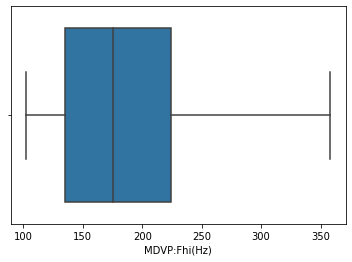

In [104]:
data_clean = remove_outliers(data)
sns.boxplot(data_clean['MDVP:Fhi(Hz)'], data=data_clean)

## Correlations

brigher color and darker color means higher correlationbrigher color and darker color means higher correlation

<AxesSubplot:>

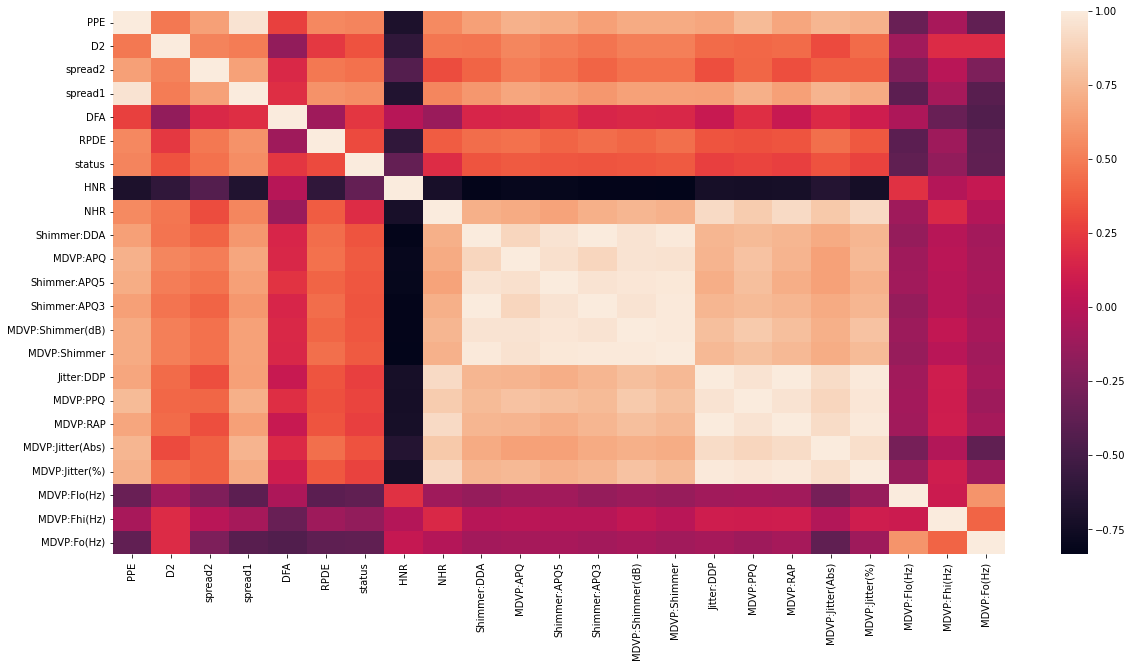

In [69]:
correlations = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlations.loc[::-1, ::-1])

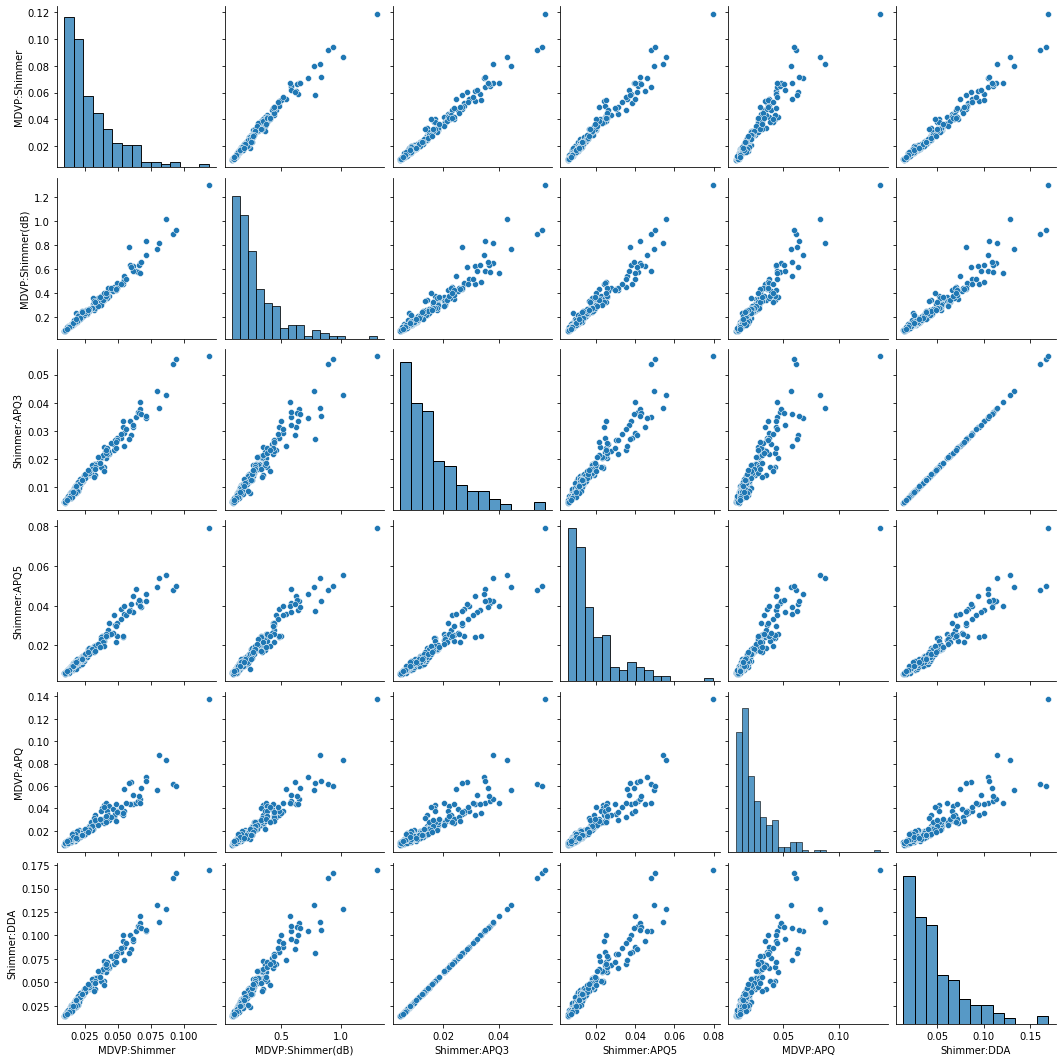

In [71]:
high_corr_shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
                     'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

sns.pairplot(data[high_corr_shimmer])

In [105]:
## Correlations with 'status' target
corr = abs(data.corr()['status']).sort_values(ascending=False)
corr[corr>0.3]

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
Name: status, dtype: float64

In [42]:
# columns to be dropped
drop_cols = list(corr[corr <= 0.3].index)
drop_cols

['NHR', 'DFA', 'MDVP:Fhi(Hz)']

In [46]:
# data_clean.drop(drop_cols, axis=1, inplace=True)

In [47]:
# data_clean.drop(['name'], axis=1, inplace=True)

# Data Split

In [111]:
# y = data_clean.status
# x = data_clean.drop(['status'], axis=1)

data.drop(['name'], axis=1, inplace=True)
y = data.status
x = data.drop(['status'], axis=1)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

# Data Scaling

In [106]:
# standard scale each column with respect to its column
def normalize(data):
    target_col = 'status'
    for x in data.columns:
        if x != target_col:
            data[x] = (data[x] - data[x].min()) / (data[x].max() - data[x].min())

In [49]:
# normalize(data_clean)

# Model

## 1. Logistic Regression

### log-transform

In [114]:
X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

skewed_var = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 
              'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 
              'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 
              'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 
              'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

X_train_lr[skewed_var] = np.log(X_train_lr[skewed_var])
#X_val_lr[skewed_var] = np.log(X_val_lr[skewed_var])
X_test_lr[skewed_var] = np.log(X_test_lr[skewed_var])

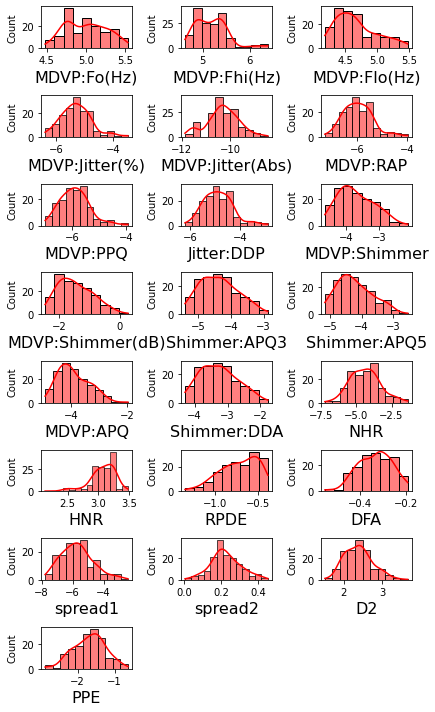

In [116]:
plot_data(X_train_lr, plot_type = 'hist', grid_size = (8,3), fig_size = (6, 10))

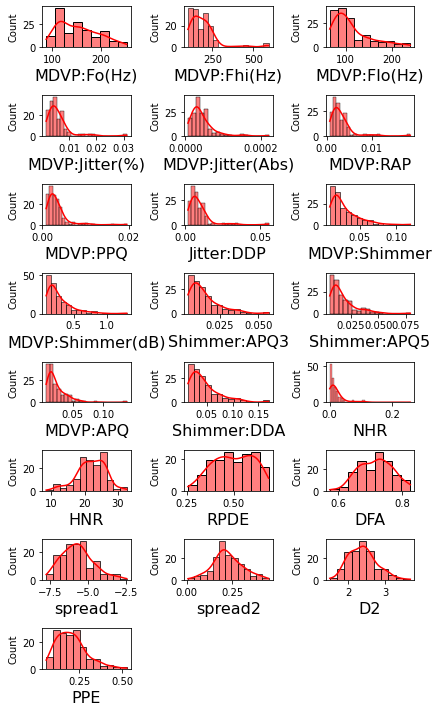

In [117]:
plot_data(X_train, plot_type = 'hist', grid_size = (8,3), fig_size = (6, 10))

In [118]:
drop_corr_columns = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
                     'MDVP:APQ', 'Shimmer:DDA', 'MDVP:Jitter(%)', 
                     'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']

X_train_lr.drop(drop_corr_columns, axis=1, inplace=True)
#X_val_lr.drop(drop_corr_columns, axis=1, inplace=True)
X_test_lr.drop(drop_corr_columns, axis=1, inplace=True)

In [119]:
# standardize the data since all variables have normal-like distribution
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic = LogisticRegression()
logistic.fit(X_train_lr, y_train)
#accuracy_score(clf.predict(X_val_lr), y_val)

LogisticRegression()

In [122]:
accuracy_score(logistic.predict(X_test_lr), y_test)

0.8974358974358975

## 2. Decision Trees

In this kind of settings it is a good idea to use trees for classification since trees are indifferent towords outliers. Moreover, since the trees don't make any assumptions about the underlying data distribution they are not sensitive to skewed distributions. An additional bonus is that decision trees will chose only one of the correlated features at a time when deciding the split. Hence, the variables correlation should not have a big impact on the decision.

In [123]:
from xgboost import XGBClassifier
svc = XGBClassifier()
svc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Evaluation

In [124]:
from sklearn.metrics import accuracy_score, confusion_matrix
preds = svc.predict(X_test)

percentage = svc.score(X_test, y_test)
print('testing accuracy:', percentage)

conf_mtx = confusion_matrix(y_test, preds)
print('testing confusion matrix:\n', conf_mtx)

testing accuracy: 0.9230769230769231
testing confusion matrix:
 [[ 8  2]
 [ 1 28]]


In [43]:
y_test.sum()

29.0